#  UNIVERSIDAD POLITÉCNICA SALESIANA

## Roberto Pacho
### jpachom1@est.ups.edu.ec

###### Enunciado:

Desarrollar una simulación del tráfico vehicular de una intersección de calles usando datos reales de una   ciudad (Cuenca). Para ello deberá llevar a cabo las siguientes tareas:
    
    - El software de simulación a emplear es Sim Traffic (http://simtraffic.helker.com/) o cualquier otra herramienta similar.
    
    - Para realizar la simulación se deben recabar datos reales del tráfico en 3 o más calles. Cada uno deberá tener calles distintas y datos diferentes (reales, tomados de cualquier fuente oficial del Gobierno o similar).
    
    - Deberá indicar en el informe la fuente de la cual se han tomado los datos e incluir los enlaces correspondientes para la verificación.
    
    - Es importante que la simulación tenga al menos 3 calles que se intersequen, dado que con ello se podrá valorar y  realizar la simulación de mejor manera.
    
    - Asimismo, debe incluir los datos de la ubicación geográfica del lugar que se está analizando en el simular (ciudad, estado/provincia, país, latitud y longitud).
    
    - Dentro del trabajo de simulación se debe buscar probar varias alternativas de control de tráfico (semáforos, señales de pare, redondeles, etc.) a fin de ver cómo afecta ello a la circulación de vehículos.


### Redondel Chola Cuencana

- Calles que intersectan: Huayna-Capac, Gaspar Sangurima, Av. Hurtado de Mendoza y Av. España
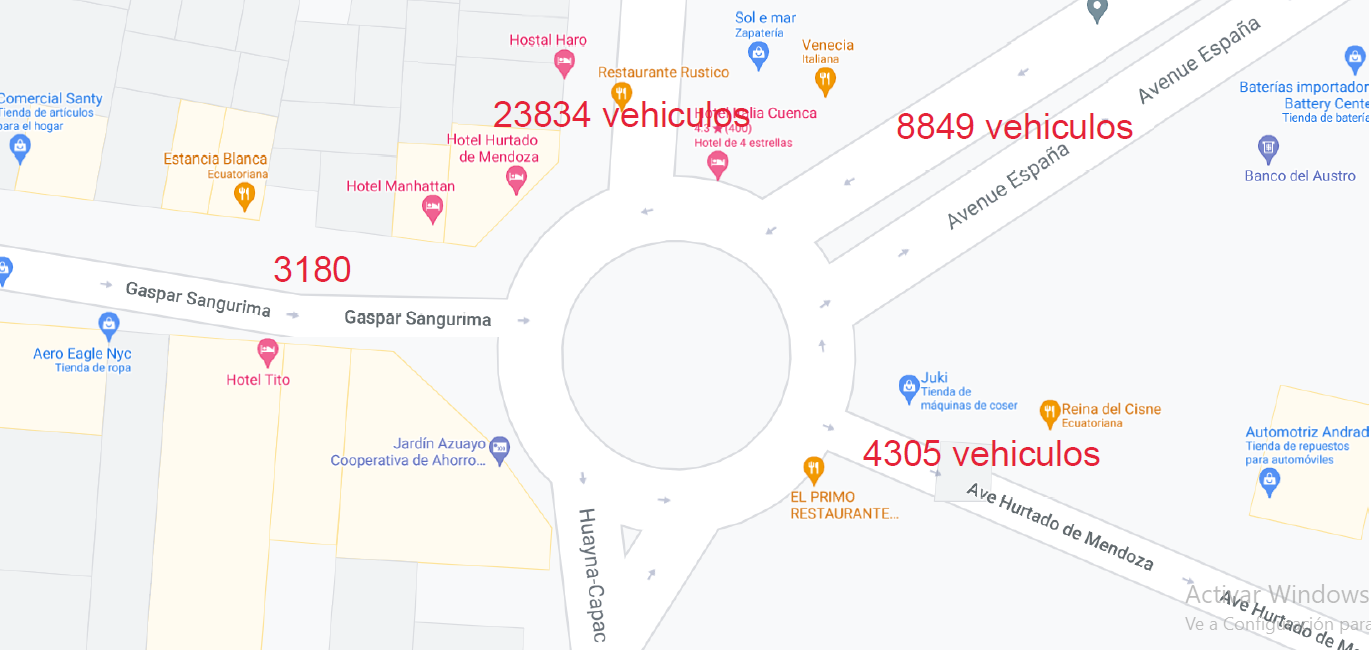

- Información de trafico vehicular del siguiente enlace http://dspace.uazuay.edu.ec/bitstream/datos/5900/1/12220.pdf


##### Simulador Utilizado SimTraffic 8 y Synchron 8
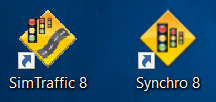

### Simulación de Tráfico Vehicular


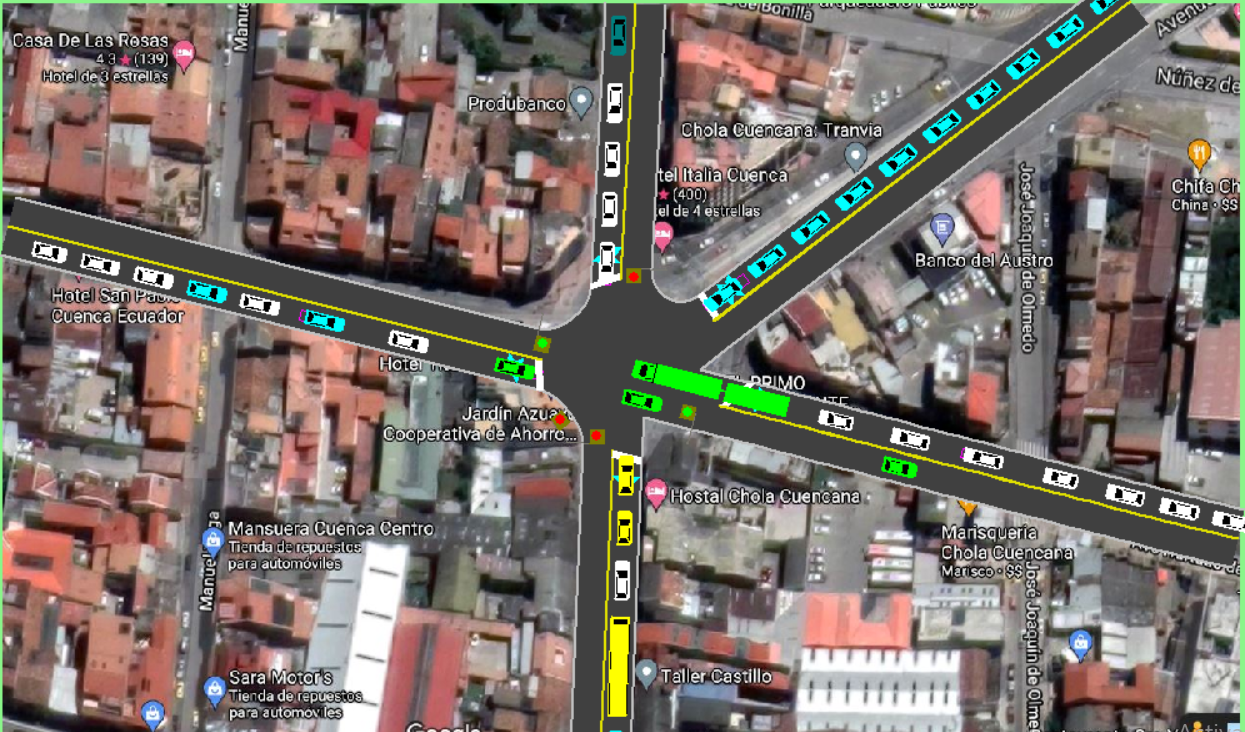

### Regresión Lineal

Es un algoritmo de aprendizaje supervisado que se utiliza en Maching Learning y en estadistic. En su version mas sencilla, lo que haremos es dibujar una recta que nos indicara la tendencia de un conjunto de los datos continuos.
- Generar un sistema de regresión que permita predecir el comportamiento del PIB del Ecuador para ello tomar los datos que están cargados dentro del AVAC solo del Ecuador, generar un cuaderno de python e incluir las secciones de Introducción, Resultados, Opinión, Conclusiones y Bibliografía.

- El producto interior bruto (PIB) es un indicador económico que refleja el valor monetario de todos los bienes y servicios finales producidos por un país o región en un determinado periodo de tiempo, normalmente un año. Se utiliza para medir la riqueza que genera un país. También se conoce como producto bruto interno (PBI).

- Finalmente analizar con el gasto y el COVID-19 dentro del Ecuador y realizar un análisis con respecto a la actualidad y cambio de gobierno del país.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
url = "datos.csv"
df = pd.read_csv(url,engine='python',sep="\;")
df


,Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.813322,65.241349,76.509512,77.555556,73.517030,71.294029,73.332115,NaN,NaN,NaN
1,Afganist�n,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,4.132233,4.453443,4.878051,9.171601,8.888893,11.258279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.669948,55.940131,50.747084,44.695031,29.754599,28.124485,29.004100,40.836290,40.556871,NaN
3,Albania,ALB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,29.241501,28.937487,28.916354,28.212979,27.267393,28.977864,31.569821,31.591574,31.555552,NaN
4,Andorra,AND,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.630699,23.256504,21.929561,22.502021,21.937317,23.698127,26.649932,26.431364,29.215526,NaN
260,"Yemen, Rep. del",YEM,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Sud�frica,ZAF,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,29.550915,29.323968,29.406919,28.613876,27.435897,25.704051,...,30.460941,29.723879,30.971341,31.468645,30.152888,30.580928,29.627669,29.907083,29.853839,NaN
262,Zambia,ZMB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.471223,40.082911,40.482717,38.822290,37.138526,35.324676,34.992858,37.957353,34.636161,NaN


In [3]:
df = df[df['Name'].isin(['Ecuador'])] #Filtro la informacion solo para Ecuador
# Luego selecciono las columnas de analisis
df = df.loc[:,['Name','1960','1961','1962','1963','1964','1965','1966','1967','1968',\
        '1968','1969','1970','1971','1972','1973','1974','1975','1976',\
        '1977','1978','1979','1980','1981','1982','1983','1984','1985',\
        '1986','1987','1988','1989','1990','1991','1992','1993','1994',\
        '1995','1996','1997','1998','1999','2000','2001','2002','2003',\
        '2004','2005','2006','2007','2008','2009','2010','2011','2012',\
        '2013','2014','2015','2016','2017','2018','2019']]
df = df.set_index('Name').T
ecua = df["Ecuador"].astype(int)
df['Ecuador'] = ecua
anios = df['Ecuador'].index.tolist()
df['Anios'] = anios
an = df["Anios"].astype(int)
df["Anios"] = an


<AxesSubplot:xlabel='Anios'>

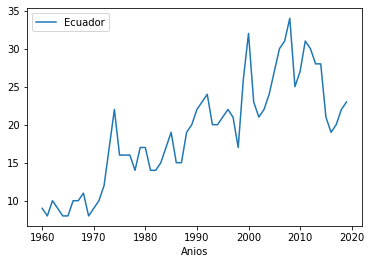

In [4]:
df.plot(y="Ecuador", x="Anios")

###### Fórmula de la Recta 
- Y = mX + b

En donde "Y" es el resultado y "X" es la variable, "m" es la pendiente de la recta y "b" la constante o tambien conocida como 
el 'punto de corte con el eje Y' en la gráfica cuando 'X=0'

In [7]:
x = list(df.iloc [:, 0]) 
y = list(df.iloc [:, 1])
# Creamos el objeto de regresion Lineal
regr = linear_model.LinearRegression()

#Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1), y)

# Veamos los coeficientes obtenidos
print('Coeficintes: \n',regr.coef_)
# este es el valor en donde corta el eje Y en (X=0)
print("Independent term: \n",regr.intercept_)


Coeficintes: 
 [2.13272535]
Independiente termino: 
 1948.9404237135661


In [14]:
#Quiero predecir el comportamiento del PIB (Producto Bruto Interno) 
y_prediccion = regr.predict([[100]])

print(int(y_prediccion))

2162


[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89]


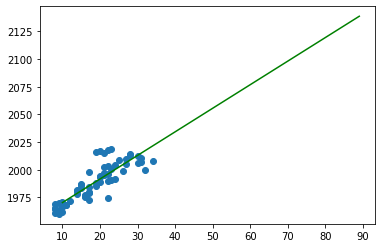

In [15]:
plt.scatter(x,y)
x_real = np.array(range(10,90)) 
print(x_real)

plt.plot(x_real, regr.predict(x_real.reshape(-1,1)), color='green')
plt.show()


In [16]:
x

[9,
 8,
 10,
 9,
 8,
 8,
 10,
 10,
 11,
 11,
 8,
 9,
 10,
 12,
 17,
 22,
 16,
 16,
 16,
 14,
 17,
 17,
 14,
 14,
 15,
 17,
 19,
 15,
 15,
 19,
 20,
 22,
 23,
 24,
 20,
 20,
 21,
 22,
 21,
 17,
 26,
 32,
 23,
 21,
 22,
 24,
 27,
 30,
 31,
 34,
 25,
 27,
 31,
 30,
 28,
 28,
 21,
 19,
 20,
 22,
 23]

### Definamos la función en Python y realicemos elprocedimiento de ajuste de curva utilizado para el crecimientologístico.

In [10]:
def modelo_logistico(x,a,b): 
    return a+b*np.log(x)
exp_fit = curve_fit(modelo_logistico,x,y)
print(exp_fit)


(array([1882.39851097,   37.3091618 ]), array([[ 66.61474569, -22.82928999],
       [-22.82928999,   7.97891718]]))


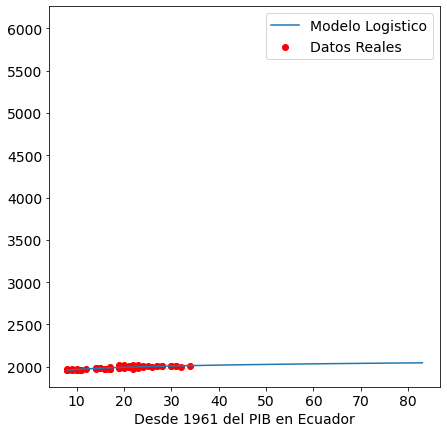

In [24]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde 1961 del PIB en Ecuador")
plt.ylabel("")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()


[1.07303055e-03 7.57519397e+00]


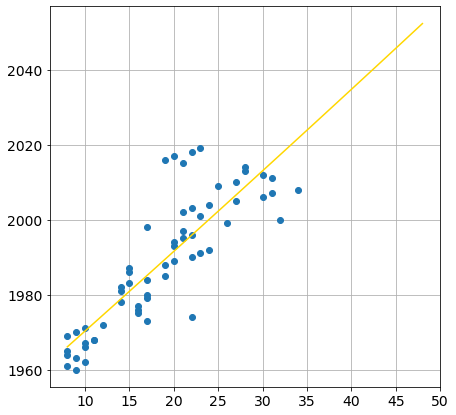

In [25]:
curve_fit = np.polyfit(x, np.log(y), deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(x), max(x)+15)))
yx = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx, color="gold")
plt.grid(True)

##### Bibliografía 
http://dspace.uazuay.edu.ec/bitstream/datos/5900/1/12220.pdf